# Notebook final

# Minería de datos grupo 001 Lunes 

## Equipo 3:

- González Berumen Ricardo         1941497
- Gaytán Gutiérrez José Claudio    1855455
- López Verduzco Ruy Aramis        1863861
- Rodríguez Pacheco Nancy Janeth   1845816
- Ruiz Espitia Thalía              1941494

# 1. Título de la base de datos

a) Nombre: Bread Basket

b) URL: https://www.kaggle.com/mittalvasu95/the-bread-basket 

# 2. Introducción general

En la operación general de un negocio tal como una panadería es de
vital importancia tener un conocimiento amplio del mercado, esto con
la razón de abastecer la demanda de los productos que forman parte
del menú, tomando decisiones estrategicas en cuanto al invenariado de acuerdo al comportamiento de los clientes.

##3. Descripción de los datos

a) ¿Qué tipo de datos son?

Es la base de datos "The bread basket" en formato csv, la cual
contiene los registros de las transacciones realizadas en un negocio de pan 
entre las fechas del 30 de octubre 2016 a las 09:58
horas 15 de abril 2017 a las 15:04 horas. Se cuenta con 9684
registros en total. 

b) Descripción de las columnas.

La tabla está compuesta de las siguientes columnas:
- Transaction :     Número de transacción que ocupa en la lista.
- Item :            El tipo de producto que tuvo la interacción.
- date_time :       Fecha y hora en que se realizó la venta.
- period_day :      Tiempo del día en que se ubica (mañana o tarde).
- weekday_weekend : Ubicación en la semana laboral (entre semana o en fin de semana).

# 4. Justificación del uso de datos

A) Características destacables
Se puede ver la manera en que la hora del día o el día de la
semana influyen en la popularidad de algún producto en especial,
por lo que para el desarrollo de un negocio es muy importante
conocer las tendencias a diferentes tiempos. Así como la
popularidad de ciertos conjuntos de productos que se compran en conjunto.

B) Beneficios del uso
Haciendo uso de los datos podemos notar que algunos productos
son comprados en conjunto, por lo que se puede dar un área de
oportunidad para capitalizar en dicha tendencia; empleando
recursos tales como promociones, descuentos, etc.
Debido a la naturaleza de los datos podemos identificar qué objetos
del menú son altamente populares en ciertas horas del dia y asi producir estrategicamente para atender la demanda.

# 5. Objetivos

- Objetivo principal: 
Identificar la popularidad de los productos que se compran en conjunto en general y de acuerdo a la hora
del día; haciendo uso de reglas de asociación para este fin.

- Objetivo secundario: 
Analizar las tendencias en las transacciones de los productos haciendo
uso de series de tiempo.

# 6. Preguntas de interés

- ¿Qué productos son comprados en conjuntos con mayor
prevalencia?
- ¿La hora del día influye en las decisiones de los clientes?
- ¿Existe alguna relación entre los productos que son
normalmente comprados en conjunto?
- ¿A qué hora del día las ventas son más prevalentes?
- ¿La popularidad del establecimiento es constante, creciente
o decreciente?

#Limpieza de datos

In [3]:
import numpy as np
import pandas as pd
import networkx as nx 
import matplotlib.pyplot as plt

## Dimensión de la base de datos

In [4]:
data = pd.read_csv("bread_basket.csv")
print("Numero de Filas y columnas: ", data.shape)
print("Nombre de las columnas: ", data.columns)
columnas = data.columns

Numero de Filas y columnas:  (20507, 5)
Nombre de las columnas:  Index(['Transaction', 'Item', 'date_time', 'period_day', 'weekday_weekend'], dtype='object')


La base de datos cueenta con 5 columnas, en las que viene la informaciíon de la transacción con el producto comprado y aspectos del día de la semana en la que se realizó la compra. Se cuenta con 20507 transacciones en la base de datos



Como los nombres en las columnas son faciles de tratar, ya que los nombres son sencillos y no están separados por espacios, se quedarán igual.

## Acercamiento a la base de datos

Se ve los primeros 5 datos de la base, para saber el tipo de dato que lleva cada columna a trabajar.

In [5]:
data.head()

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


In [6]:
data.dtypes

Transaction         int64
Item               object
date_time          object
period_day         object
weekday_weekend    object
dtype: object

Se puede notar como sólo el número de transacciones es un valor numerico, todos los demás datos son categoricos.

## Datos nulos

In [7]:
data.isnull().any()

Transaction        False
Item               False
date_time          False
period_day         False
weekday_weekend    False
dtype: bool

Por lo tanto todas las transacciones en la base de datos tienen la información completa

## Valores únicos

Como se harán clasificaciones por producto en cada transacción, nos interesa ver los productos únicos en las transacciones y la cantidad de cada uno. 

In [8]:
conteoProductos = data.groupby(by= "Item").size().reset_index(name='counts').sort_values(by = "counts", ascending=False)
print(conteoProductos)

              Item  counts
23          Coffee    5471
11           Bread    3325
83             Tea    1435
15            Cake    1025
65          Pastry     856
..             ...     ...
19    Chicken sand       1
41    Gift voucher       1
63  Olum & polenta       1
71        Raw bars       1
0       Adjustment       1

[94 rows x 2 columns]


También los valores únicos por columna: 


In [9]:
for columna in columnas:
    print(str(columna))
    print(np.unique(data[str(columna)]))

Transaction
[   1    2    3 ... 9682 9683 9684]
Item
['Adjustment' 'Afternoon with the baker' 'Alfajores' 'Argentina Night'
 'Art Tray' 'Bacon' 'Baguette' 'Bakewell' 'Bare Popcorn' 'Basket'
 'Bowl Nic Pitt' 'Bread' 'Bread Pudding' 'Brioche and salami' 'Brownie'
 'Cake' 'Caramel bites' 'Cherry me Dried fruit' 'Chicken Stew'
 'Chicken sand' 'Chimichurri Oil' 'Chocolates' 'Christmas common' 'Coffee'
 'Coffee granules ' 'Coke' 'Cookies' 'Crepes' 'Crisps'
 'Drinking chocolate spoons ' 'Duck egg' 'Dulce de Leche' 'Eggs'
 "Ella's Kitchen Pouches" 'Empanadas' 'Extra Salami or Feta' 'Fairy Doors'
 'Farm House' 'Focaccia' 'Frittata' 'Fudge' 'Gift voucher'
 'Gingerbread syrup' 'Granola' 'Hack the stack' 'Half slice Monster '
 'Hearty & Seasonal' 'Honey' 'Hot chocolate' 'Jam' 'Jammie Dodgers'
 'Juice' 'Keeping It Local' 'Kids biscuit' 'Lemon and coconut' 'Medialuna'
 'Mighty Protein' 'Mineral water' 'Mortimer' 'Muesli' 'Muffin'
 'My-5 Fruit Shoot' 'Nomad bag' 'Olum & polenta' 'Panatone' 'Pastry'
 

Aquí se puede notar toda la variedad de productos con los que cuenta la tienda, así como la división que se hace de los días.

## Modificación del formato de fecha

Como la base de datos venía en formato de day/month/year y este formato no permite ordenar por fecha o agrupar ya sea por año o mes, se optó por modificarla y se agregó en columnas distintas:

In [10]:
#Rutina para cambiar formato de la fecha
year = []
month = []
day = []
cleanDate = []
for fecha in data["date_time"]:
    #print(fecha)
    #Para separar año
    for fechaseparada in fecha.split("-"):
        if len(fechaseparada)>2:
            yearTEMP = fechaseparada.split(" ")[0]
            year.append(yearTEMP)
    #Para separar dia
    dayTEMP = fecha.split("-")[0]
    day.append(dayTEMP)
    #Para separar mes
    monthTEMP = fecha.split("-")[1]
    month.append(monthTEMP)
    clean = yearTEMP + "-" + monthTEMP + "-" + dayTEMP
    cleanDate.append(clean)

#print(cleanDate)
#Agregamos las columnas a la base de datos
data_cleandate = data.assign(clean_date = cleanDate,year = year, month = month, day = day)
data_cleandate

,Transaction,Item,date_time,period_day,weekday_weekend,clean_date,year,month,day
0,1,Bread,30-10-2016 09:58,morning,weekend,2016-10-30,2016,10,30
1,2,Scandinavian,30-10-2016 10:05,morning,weekend,2016-10-30,2016,10,30
2,2,Scandinavian,30-10-2016 10:05,morning,weekend,2016-10-30,2016,10,30
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend,2016-10-30,2016,10,30
4,3,Jam,30-10-2016 10:07,morning,weekend,2016-10-30,2016,10,30
...,...,...,...,...,...,...,...,...,...
20502,9682,Coffee,09-04-2017 14:32,afternoon,weekend,2017-04-09,2017,04,09
20503,9682,Tea,09-04-2017 14:32,afternoon,weekend,2017-04-09,2017,04,09
20504,9683,Coffee,09-04-2017 14:57,afternoon,weekend,2017-04-09,2017,04,09
20505,9683,Pastry,09-04-2017 14:57,afternoon,weekend,2017-04-09,2017,04,09


Para realizar una serie de tiempo con las ventas por día, se tienen que contar todas las ventas con la misma fecha, este dato se guardará en una variable llamada "serieVentas"

In [11]:
serieVentas = data_cleandate.groupby(by = "clean_date").size().reset_index(name='counts').sort_values(by = "clean_date", ascending=True)
print(serieVentas)

     clean_date  counts
0    2016-10-30     170
1    2016-10-31     199
2    2016-11-01     150
3    2016-11-02     164
4    2016-11-03     189
..          ...     ...
154  2017-04-05     143
155  2017-04-06     118
156  2017-04-07      99
157  2017-04-08     205
158  2017-04-09      69

[159 rows x 2 columns]


# Descripción estadística básica

Para este apartado se hará uso de la serie de tiempo

In [12]:
print("\t\tESTADÍSTICA BÁSICA DE LA SERIE DE VENTAS DIARIAS: \nSuma: ",serieVentas["counts"].sum(),
"\nPromedio: ",serieVentas["counts"].mean(),
"\nConteo: ",serieVentas["counts"].count(), 
"\nMinimo: ",serieVentas["counts"].min(),
"\nMaximo: ",serieVentas["counts"].max(),
"\nMedia: ",serieVentas["counts"].median(),
"\nVarianza: ",serieVentas["counts"].var(),
"\nDesviacion estandar: ",serieVentas["counts"].std(),
"\nSkewness: ",serieVentas["counts"].skew(),
"\nKurtosis: ",serieVentas["counts"].kurt())


		ESTADÍSTICA BÁSICA DE LA SERIE DE VENTAS DIARIAS: 
Suma:  20507 
Promedio:  128.9748427672956 
Conteo:  159 
Minimo:  1 
Maximo:  292 
Media:  118.0 
Varianza:  2028.2778441206906 
Desviacion estandar:  45.03640576378948 
Skewness:  0.8689889126550832 
Kurtosis:  1.3249945707062833


El promedio de ventas por día es de 129 ventas, también se puede notar que el mínimo de ventas realizadas en un día es de un artículo y el máximo de ventas realizadas en un día es de 292 ventas

# Gráficas

In [13]:
import warnings 
warnings.filterwarnings('ignore')

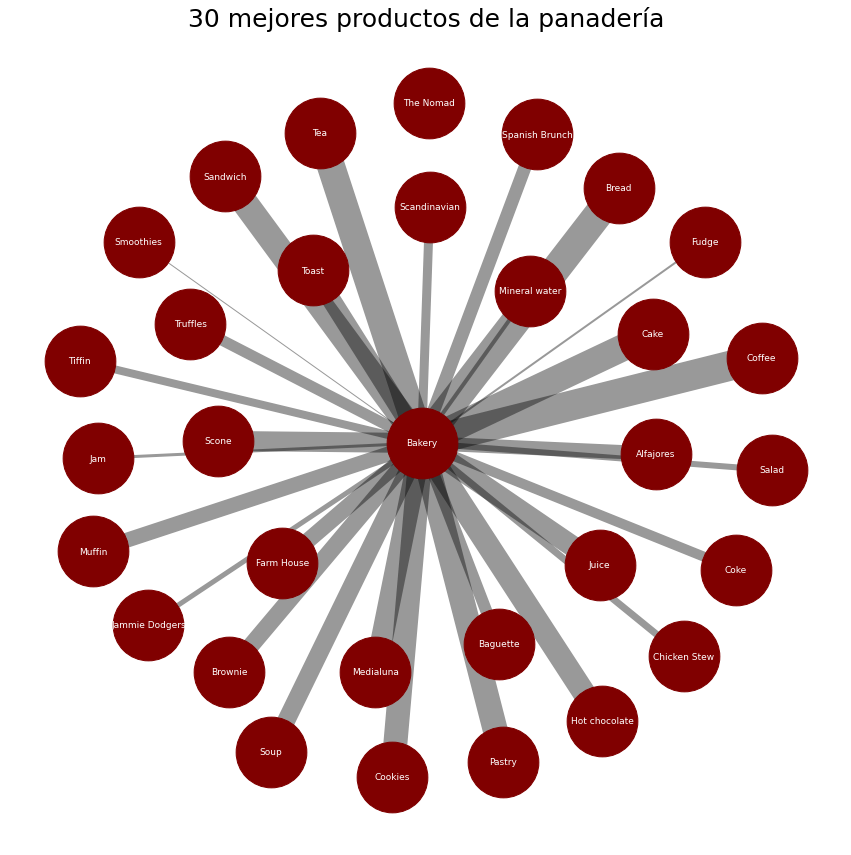

In [14]:
data_vis = data.copy()
df_network_first = data_vis.groupby("Item").sum().sort_values("Transaction", ascending=False).reset_index()
df_network_first["Type"] = "Bakery"
df_network_first = df_network_first.truncate(before=-1, after=30) 
plt.rcParams['figure.figsize']=(15,15)
j = 0
for i, _ in reversed(list(enumerate(df_network_first['Transaction']))):
    df_network_first['Transaction'][j] = i
    j+=1
first_choice = nx.from_pandas_edgelist(df_network_first, source='Type', target="Item", edge_attr='Transaction')
prior = [i['Transaction'] for i in dict(first_choice.edges).values()]
pos = nx.spring_layout(first_choice)
nx.draw_networkx_nodes(first_choice, pos, node_size=5000, node_color="maroon")
nx.draw_networkx_edges(first_choice, pos, width=prior, alpha=0.4, edge_color='black')
nx.draw_networkx_labels(first_choice, pos, font_size=9, font_family='sans-serif', font_color = 'white')
plt.axis('off')
plt.grid()
plt.title('30 mejores productos de la panadería', fontsize=25)
plt.show()

De manera visual se tienen los mejores 30 productos con los que cuenta la panadería, para verlo de una manera cuantitativa se pueden usar otro tipo de gráficas. 


## Gráfica de barras

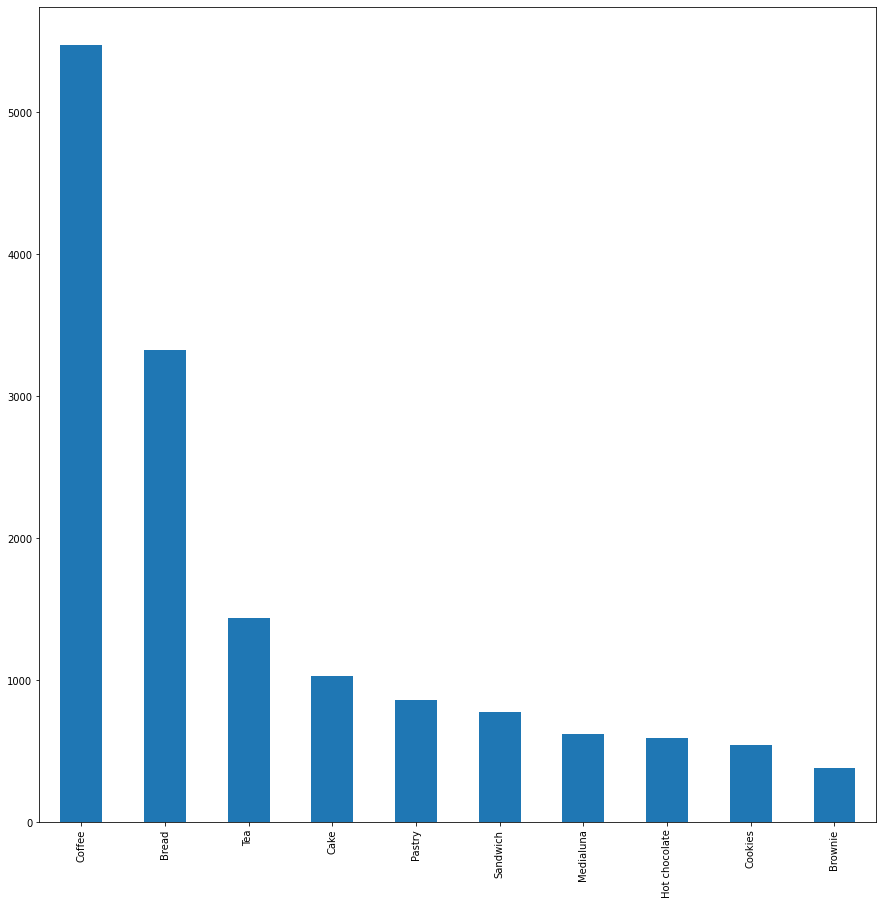

In [15]:
data_cleandate["Item"].value_counts().head(10).plot.bar()


Aquí se pueden observar los 10 productos más vendidos, se puede ver como el café es significativamente más vendido que los demás productos.

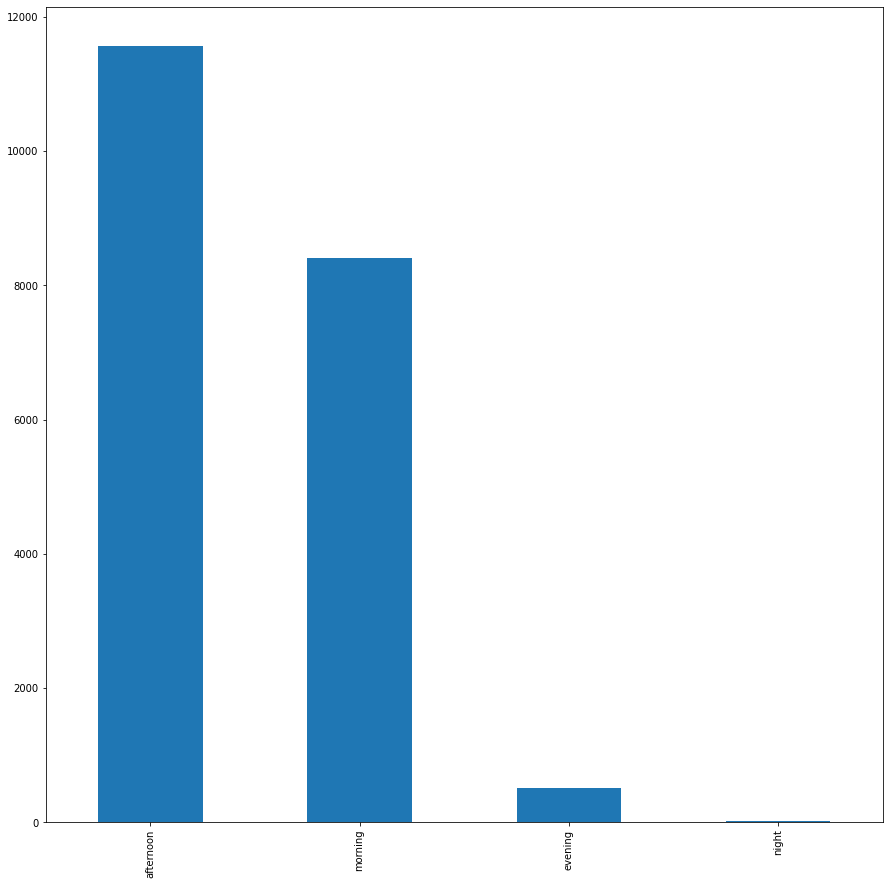

In [16]:
data_cleandate["period_day"].value_counts().plot.bar()

En la distribución de las ventas se puede notar que la mañana y la tarde son los mejores horarios de ventas para la panadería.

## Gráfica de lineas

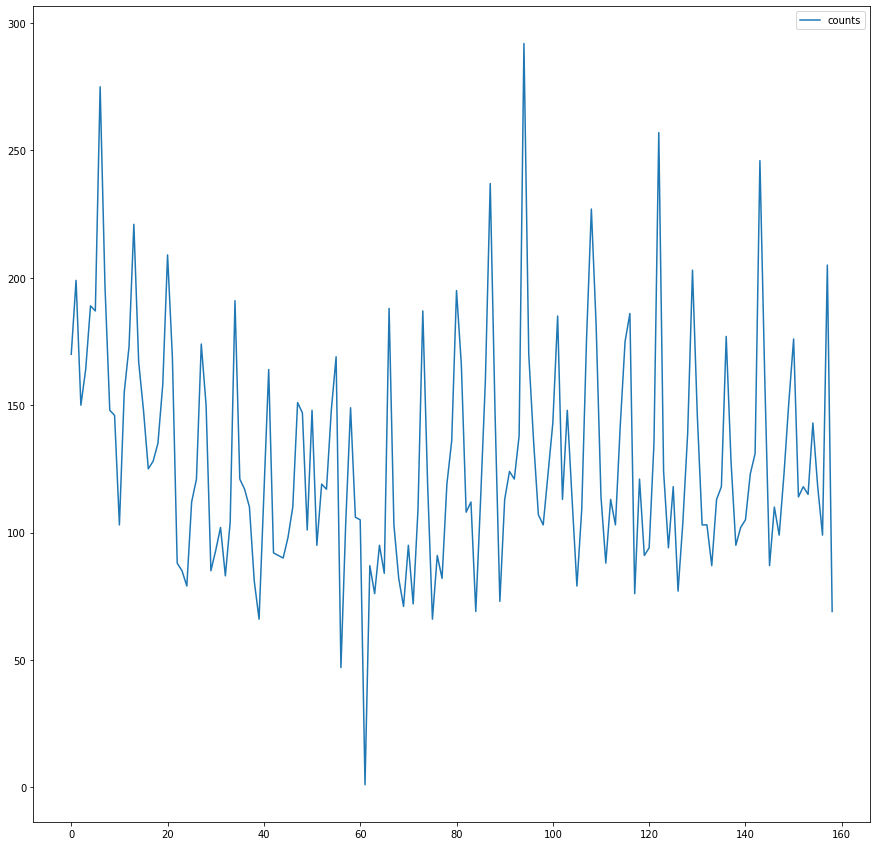

In [17]:
serieVentas.plot.line()

Para esta gráfica se usan los valores de la serie de tiempo, así se puede ver la tendencia de los datos a través del tiempo.

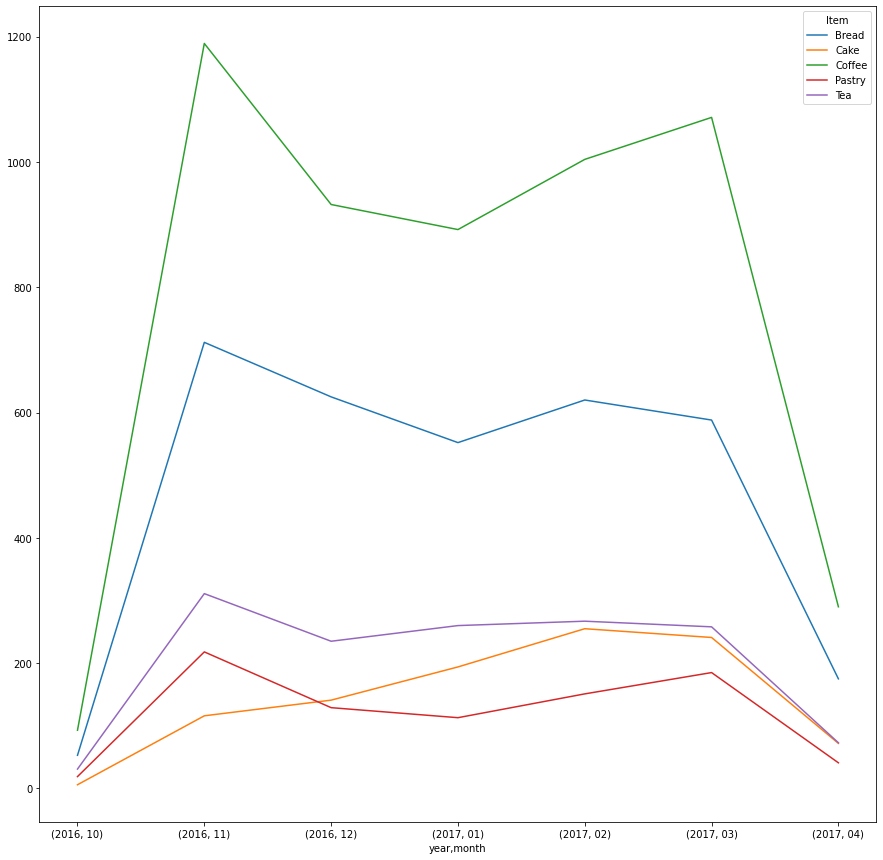

In [18]:
pd.DataFrame(data_cleandate[data_cleandate.Item.isin(["Coffee","Bread","Tea","Cake","Pastry"])].pivot_table(index = ["year","month"], columns = "Item", aggfunc = "size",fill_value = 0)).plot.line()

Aquí se notan las ventas de los 5 productos más vendidos a lo largo del tiempo, se puede ver como en el 2016 en el mes de noviembre hubo un pico importante de compras para todos estos productos, de igual manera hay un pico presente en marzo de 2017.



## Stacked plot

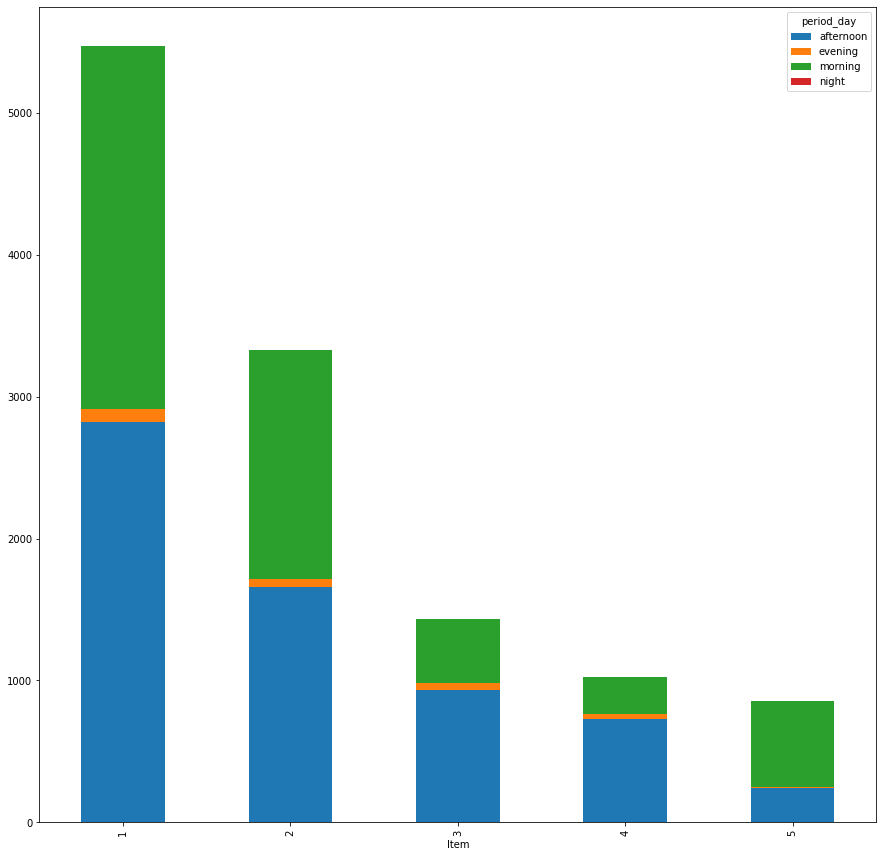

In [19]:
pd.DataFrame(data_cleandate.replace(["Coffee","Bread","Tea","Cake","Pastry"],[1,2,3,4,5]).pivot_table(index="Item", columns="period_day", aggfunc="size", fill_value=0))[['afternoon','evening','morning','night']].head(5).plot.bar(stacked = True)

Aquí se pueden ver los mejores 5 productos y en el momento del día en el que son más comprados.

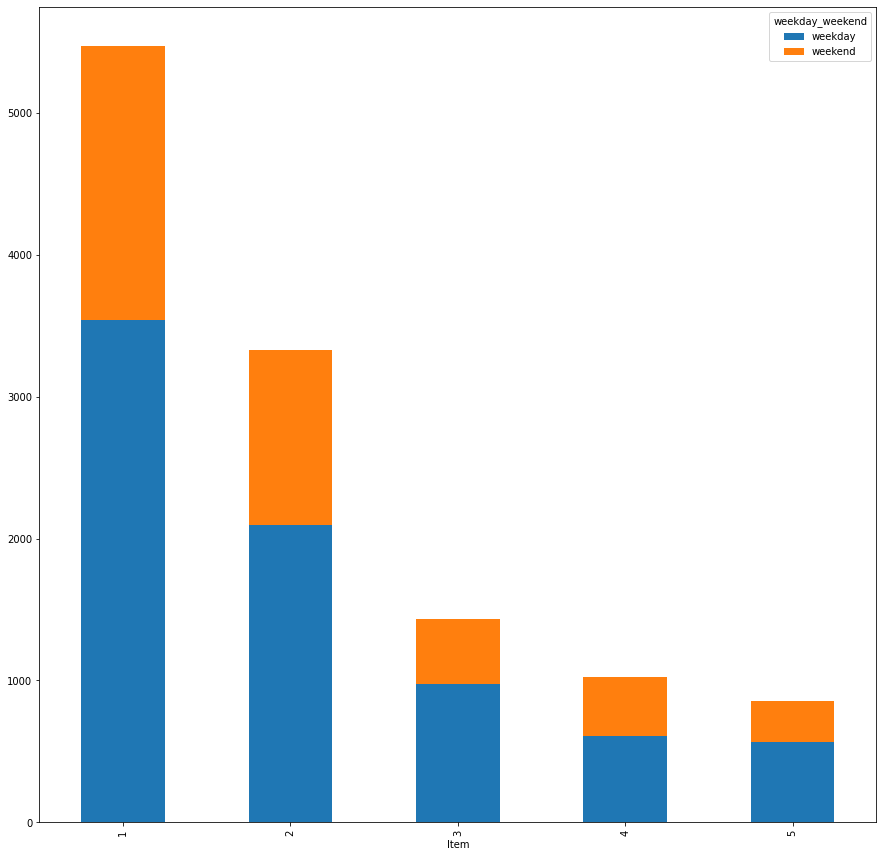

In [20]:
pd.DataFrame(data_cleandate.replace(["Coffee","Bread","Tea","Cake","Pastry"],[1,2,3,4,5]).pivot_table(index="Item", columns="weekday_weekend", aggfunc="size", fill_value=0))[['weekday','weekend']].head(5).plot.bar(stacked = True)

De igual manera se tienen los mejores 5 productos de la panadería, pero ahora se clasifican según si la compra se hizo en un día entre semana o en fin de semana

# Técnicas de minería

 El código presentado para la parte de reglas de aociación en este documento se hizo con la ayuda de las siguientes refenecias: 
-  https://pharos.sh/mineria-de-reglas-de-asociacion-a-traves-del-algoritmo-apriori-en-python/
-  https://www.jacobsoft.com.mx/es_mx/aprendizaje-con-reglas-de-asociacion/

## Reglas de asociación

Como objetivo principal se quiere encontrar en que momento del día se compran ciertos productos, así como también que productos van acompañados en las transacciones. 
Es por esto que se utilizaron reglas de asociación, para así conseguir los itemsets más repetidos

In [21]:
datos = pd.read_csv("bread_basket.csv")
print("Número de filas y columnas", datos.shape)
print("Nombre de las columnas", datos.columns)
columnas = datos.columns

Número de filas y columnas (20507, 5)
Nombre de las columnas Index(['Transaction', 'Item', 'date_time', 'period_day', 'weekday_weekend'], dtype='object')


In [22]:
transacciones = []
for i in range(0,20507):
  transacciones.append([str(datos.values[i,j]) for j in range(0,5)])

In [23]:
pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5974 sha256=e97594a41665c65d3e7d4d1d67e132428ed4db4f1f5c7bd3475666188c05218a
  Stored in directory: /root/.cache/pip/wheels/cb/f6/e1/57973c631d27efd1a2f375bd6a83b2a616c4021f24aab84080
Successfully built apyori


In [24]:
from apyori import apriori
itemsets = apriori(transacciones, min_support = 0.01, min_confidence = 0.05, min_lift = 1.01, min_length = 2)
itemsets = list(itemsets)

In [25]:
print(len(itemsets))
print(itemsets[0])

45
RelationRecord(items=frozenset({'afternoon', 'Alfajores'}), support=0.011947140000975277, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Alfajores'}), items_add=frozenset({'afternoon'}), confidence=0.6639566395663957, lift=1.1769175216170866)])


In [26]:
def inspect(itemsets):
  rh = [tuple(result[2][0][1]) for result in itemsets]
  lh = [tuple(result[2][0][0]) for result in itemsets]
  soporte = [result[1] for result in itemsets]
  confianza = [result[2][0][2] for result in itemsets]
  lift = [result[2][0][3] for result in itemsets]
  return list(zip(rh, lh, soporte, confianza, lift))

In [27]:
Tabla = pd.DataFrame(inspect(itemsets), columns=["lhs", "rhs", "soporte", "confianza", "lift"])
Tabla

,lhs,rhs,soporte,confianza,lift
0,"(afternoon,)","(Alfajores,)",0.011947,0.663957,1.176918
1,"(morning,)","(Bread,)",0.078510,0.484211,1.181545
2,"(afternoon,)","(Brownie,)",0.012142,0.656992,1.164572
3,"(afternoon,)","(Cake,)",0.035646,0.713171,1.264154
4,"(weekend,)","(Cake,)",0.020139,0.402927,1.073094
5,"(morning,)","(Coffee,)",0.124884,0.468105,1.142244
6,"(weekday,)","(Coffee,)",0.172770,0.647596,1.036953
7,"(afternoon,)","(Cookies,)",0.015263,0.579630,1.027441
8,"(weekday,)","(Cookies,)",0.019408,0.737037,1.180169
9,"(morning,)","(Farm House,)",0.010240,0.561497,1.370136


Los itemsets acomodados de mayor a menor confianza:

In [28]:
Tabla.sort_values("confianza", ascending=False)

,lhs,rhs,soporte,confianza,lift
20,"(afternoon,)","(Soup,)",0.015848,0.950292,1.684471
17,"(afternoon,)","(Sandwich,)",0.032721,0.870298,1.542675
21,"(weekday,)","(Soup,)",0.013069,0.783626,1.254768
41,"(weekday, afternoon)","(Soup,)",0.012484,0.748538,2.110583
8,"(weekday,)","(Cookies,)",0.019408,0.737037,1.180169
24,"(weekday,)","(Toast,)",0.011167,0.720126,1.153090
44,"(weekday,)","(morning, Tea)",0.015995,0.719298,1.151765
3,"(afternoon,)","(Cake,)",0.035646,0.713171,1.264154
15,"(morning,)","(Pastry,)",0.029453,0.705607,1.721786
25,"(weekday,)","(evening,)",0.017360,0.684615,1.096229


## Series de tiempo

Como se quiere como objetivo secundario ver la tendencia de las ventas, haciendo una serie de tiempo se puede lograr este objetivo

Para la parte de series de tiempo se hará uso del leguaje de programación R

In [29]:
%load_ext rpy2.ipython

In [30]:
%%R
install.packages("tseries")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘zoo’, ‘quantmod’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/xts_0.12.1.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 517875 bytes (505 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R

In [31]:
%%R
library(tseries)

R[write to console]: Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

R[write to console]: 
    ‘tseries’ version: 0.10-48

    ‘tseries’ is a package for time series analysis and computational
    finance.

    See ‘library(help="tseries")’ for details.




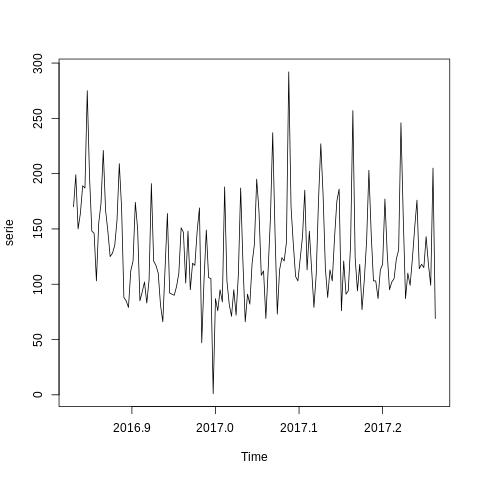

In [32]:
%%R -i serieVentas

serie<-ts(serieVentas$counts,frequency=365,start=c(2016,304))
plot(serie)

In [33]:
%%R
serie

Time Series:
Start = c(2016, 304) 
End = c(2017, 97) 
Frequency = 365 
  [1] 170 199 150 164 189 187 275 197 148 146 103 155 173 221 167 148 125 128
 [19] 135 158 209 169  88  85  79 112 121 174 150  85  93 102  83 104 191 121
 [37] 117 110  81  66 115 164  92  91  90  98 110 151 147 101 148  95 119 117
 [55] 148 169  47 104 149 106 105   1  87  76  95  84 188 103  82  71  95  72
 [73] 109 187 119  66  91  82 119 136 195 166 108 112  69 113 160 237 147  73
 [91] 113 124 121 138 292 170 136 107 103 123 143 185 113 148 113  79 109 176
[109] 227 181 114  88 113 103 142 175 186  76 121  91  94 135 257 124  94 118
[127]  77 104 139 203 146 103 103  87 113 118 177 128  95 102 105 123 131 246
[145] 161  87 110  99 123 151 176 114 118 115 143 118  99 205  69


# Clasificación de la serie

## Cambios en media

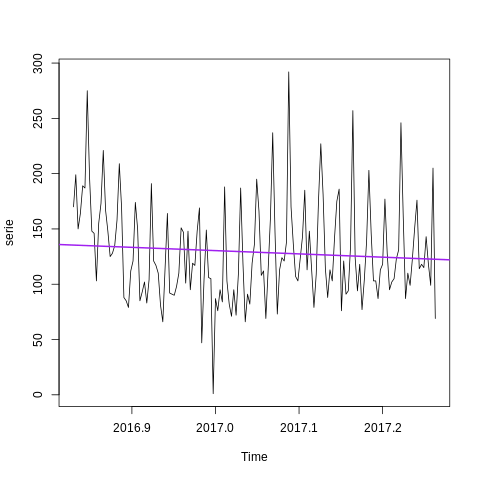

In [34]:
%%R
lineal<-lm(serie~time(serie))
plot(serie)
abline(lineal,col="purple",lwd=2)

In [35]:
%%R
summary(lineal)


Call:
lm(formula = serie ~ time(serie))

Residuals:
    Min      1Q  Median      3Q     Max 
-129.44  -30.64  -10.06   21.07  164.24 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept) 59928.33   57273.30   1.046    0.297
time(serie)   -29.65      28.39  -1.044    0.298

Residual standard error: 45.02 on 157 degrees of freedom
Multiple R-squared:  0.006896,	Adjusted R-squared:  0.0005703 
F-statistic:  1.09 on 1 and 157 DF,  p-value: 0.298



H0: La regresión no es significativa        
Ha: La regresión es significativa

- pvalor = 0.298

- alfa = 0.05

Como p-valor > alfa, no rechazo H0 

Por lo tanto, con el 95% de confianza se tiene evidencia estadística para decir que la regresión no es significativa





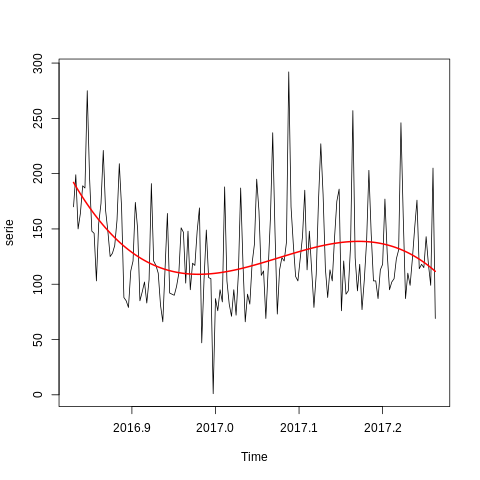

In [36]:
%%R
cubico<-lm(serie~poly(as.numeric(time(serie)),degree=3))
plot(serie)
lines(as.numeric(time(serie)),fitted.values(cubico),col="red",lwd=2)

In [37]:
%%R
summary(cubico)


Call:
lm(formula = serie ~ poly(as.numeric(time(serie)), degree = 3))

Residuals:
     Min       1Q   Median       3Q      Max 
-108.675  -25.393   -7.553   18.290  165.313 

Coefficients:
                                           Estimate Std. Error t value Pr(>|t|)
(Intercept)                                 128.975      3.328  38.750  < 2e-16
poly(as.numeric(time(serie)), degree = 3)1  -47.009     41.969  -1.120 0.264410
poly(as.numeric(time(serie)), degree = 3)2  131.448     41.969   3.132 0.002076
poly(as.numeric(time(serie)), degree = 3)3 -167.205     41.969  -3.984 0.000104
                                              
(Intercept)                                ***
poly(as.numeric(time(serie)), degree = 3)1    
poly(as.numeric(time(serie)), degree = 3)2 ** 
poly(as.numeric(time(serie)), degree = 3)3 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 41.97 on 155 degrees of freedom
Multiple R-squared:  0.1481,	Adjusted R-squared:  

H0: La regresión no es significativa        
Ha: La regresión es significativa

- pvalor = 1.609e-05

- alfa = 0.05

Como p-valor < alfa, rechazo H0 

Por lo tanto, con el 95% de confianza se tiene evidencia estadística para decir que la regresión es significativa

<<< Como la serie presenta tendencia, no es estacionaria en media >>>

## Cambios en varianza

In [38]:
%%R 
adf.test(serie,alternative="stationary")


	Augmented Dickey-Fuller Test

data:  serie
Dickey-Fuller = -3.8297, Lag order = 5, p-value = 0.01936
alternative hypothesis: stationary



H0: La serie no es estacionaria en varianza       
Ha: La serie es estacionaria en varianza

- pvalor = 0.01936

- alfa = 0.05

Como p-valor < alfa, rechazo H0 

Por lo tanto, con el 95% de confianza se tiene evidencia estadística para decir que la serie es estacionaria en varianza

## Clasificación de la serie: 

Serie no estacionaria por cambios en media

# Corrección de la serie

Para hacer la serie estacionaria, se hará una correción usando la función de diferenciación

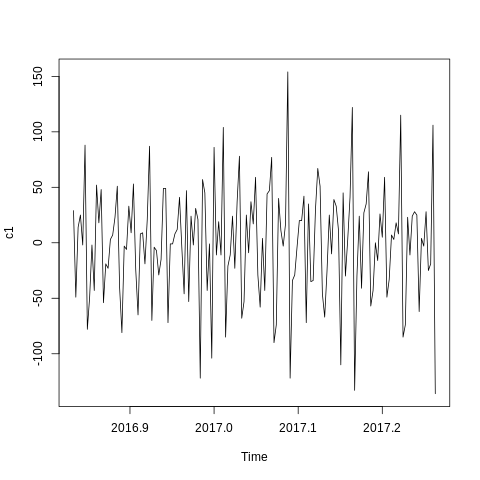

In [39]:
%%R
c1<-diff(serie)
plot(c1)

## Cambios en media 


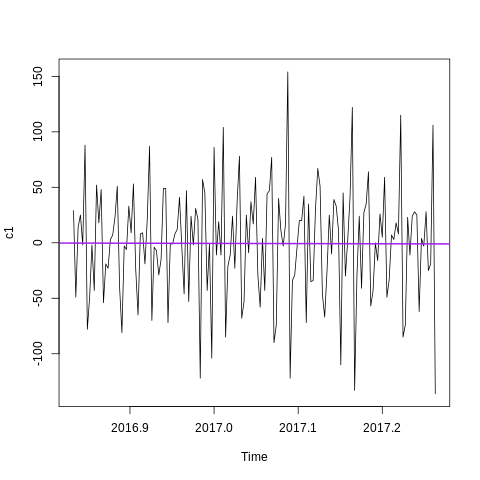

In [40]:
%%R
lineal<-lm(c1~time(c1))
plot(c1)
abline(lineal,col="purple",lwd=2)

In [41]:
%%R
summary(lineal)


Call:
lm(formula = c1 ~ time(c1))

Residuals:
     Min       1Q   Median       3Q      Max 
-135.001  -31.364    3.871   30.390  154.706 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept)  3373.831  65555.913   0.051    0.959
time(c1)       -1.673     32.501  -0.051    0.959

Residual standard error: 51.05 on 156 degrees of freedom
Multiple R-squared:  1.698e-05,	Adjusted R-squared:  -0.006393 
F-statistic: 0.00265 on 1 and 156 DF,  p-value: 0.959



H0: La regresión no es significativa        
Ha: La regresión es significativa

- pvalor = 0.959

- alfa = 0.05

Como p-valor > alfa, no rechazo H0 

Por lo tanto, con el 95% de confianza se tiene evidencia estadística para decir que la regresión no es significativa

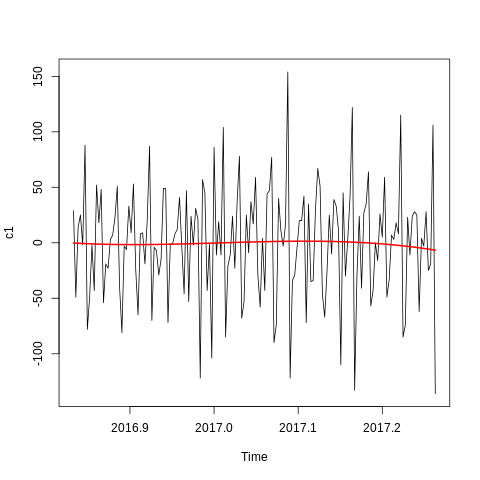

In [42]:
%%R
cubico<-lm(c1~poly(as.numeric(time(c1)),degree=3))
plot(c1)
lines(as.numeric(time(c1)),fitted.values(cubico),col="red",lwd=2)

In [43]:
%%R
summary(cubico)


Call:
lm(formula = c1 ~ poly(as.numeric(time(c1)), degree = 3))

Residuals:
     Min       1Q   Median       3Q      Max 
-133.506  -31.304    3.746   31.866  152.654 

Coefficients:
                                        Estimate Std. Error t value Pr(>|t|)
(Intercept)                              -0.6392     4.0853  -0.156    0.876
poly(as.numeric(time(c1)), degree = 3)1  -2.6277    51.3508  -0.051    0.959
poly(as.numeric(time(c1)), degree = 3)2 -15.9848    51.3508  -0.311    0.756
poly(as.numeric(time(c1)), degree = 3)3 -14.1451    51.3508  -0.275    0.783

Residual standard error: 51.35 on 154 degrees of freedom
Multiple R-squared:  0.001138,	Adjusted R-squared:  -0.01832 
F-statistic: 0.05847 on 3 and 154 DF,  p-value: 0.9814



H0: La regresión no es significativa        
Ha: La regresión es significativa

- pvalor = 0.9814

- alfa = 0.05

Como p-valor > alfa, no rechazo H0 

Por lo tanto, con el 95% de confianza se tiene evidencia estadística para decir que la regresión no es significativa

La serie no presenta tendencia, serie estacionaria en media

## Cambios en varianza

In [44]:
%%R 
adf.test(c1,alternative="stationary")


	Augmented Dickey-Fuller Test

data:  c1
Dickey-Fuller = -17.968, Lag order = 5, p-value = 0.01
alternative hypothesis: stationary



H0: La serie no es estacionaria en varianza       
Ha: La serie es estacionaria en varianza

- pvalor = 0.01

- alfa = 0.05

Como p-valor < alfa, rechazo H0 

Por lo tanto, con el 95% de confianza se tiene evidencia estadística para decir que la serie es estacionaria en varianza

## Clasificación de la serie
La serie es estacionaria

# Selección de modelo

In [45]:
%%R

options(warns=-1)
min<-Inf

for(j in 0:9){
  
  for(i in 0:9){
    
    u<-AIC(arima(c1,order=c(j,0,i),method="ML"))
    
    if(u<min){
      min<-u
      pq<-c(j,i)
    }
  }
}

min
pq


[1] 7 9


Después de correr el ciclo, el mejor modelo para la corrección es un ARMA(7,9)

In [46]:
%%R

mejor<-arima(c1,order=c(7,0,9),method="ML")


In [47]:
%%R
AIC(mejor)

[1] 1548.688


# Ruido blanco

Para saber si se pueden hacer preddicciones con el modelo, se tiene que checar que se cumplan los supuestos de ruido blanco

In [48]:
%%R

r<-residuals(mejor)

## Media cero

In [49]:
%%R 

cat(mean(r))
cat("\n",mean(r)/var(r))


0.3803036
 0.0004988511

Como la media es cercana al cero, se puede decir que el supuesto de media cero se cumple

## Varianza constante

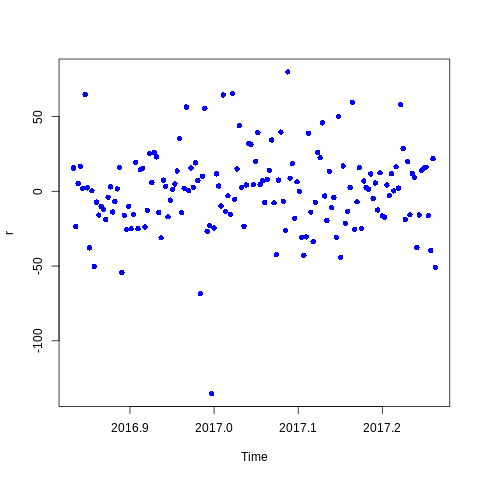

In [50]:
%%R 

plot(r,type="p",col="blue",pch=16)

Como no se tienen patrones aparentes, el supuesto de varianza constante también se cumple

## Incorrelación 

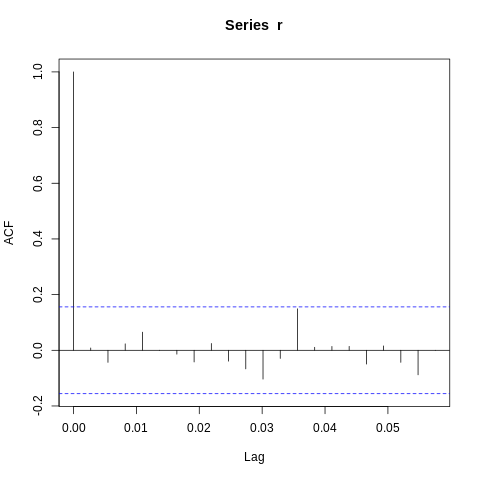

In [51]:
%%R
acf(r)

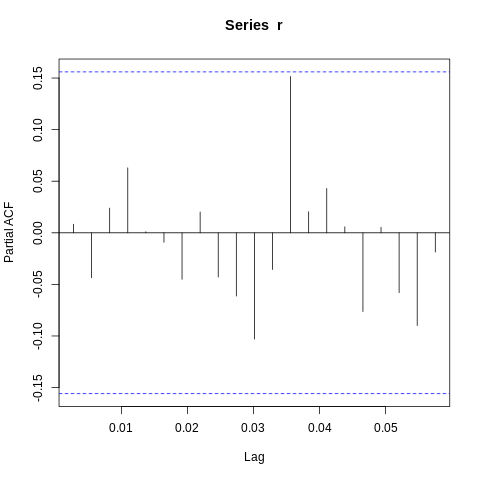

In [52]:
%%R
pacf(r)

In [53]:
%%R
Box.test(r)


	Box-Pierce test

data:  r
X-squared = 0.010958, df = 1, p-value = 0.9166



H0: Los datos son indpendientes      
Ha: Los datos son dependientes

- pvalor = 0.9166

- alfa = 0.05

Como p-valor > alfa, no rechazo H0 

Por lo tanto, con el 95% de confianza se tiene evidencia estadística para decir que los residuales son independientes

Por lo tanto los datos cumplen con los supuestos de ruido blanco, es seguro hacer predicciones

## Normalidad

In [54]:
%%R
shapiro.test(r)


	Shapiro-Wilk normality test

data:  r
W = 0.95442, p-value = 4.931e-05



H0: Los datos siguen una distribución normal      
Ha: Los datos siguen cualquier otra distribución

- pvalor = 4.931e-05

- alfa = 0.05

Como p-valor < alfa, rechazo H0 

Por lo tanto, con el 95% de confianza se tiene evidencia estadística para decir que los residuales no siguen una distribución normal

## Predicciones

In [55]:
%%R
mejor.org<-arima(serie,order=c(7,1,9),method="ML")

In [56]:
%%R 
pred<-predict(mejor.org,n.ahead=40)$pred
pred

Time Series:
Start = c(2017, 98) 
End = c(2017, 137) 
Frequency = 365 
 [1]  84.61183  90.72790 129.34268 125.91963 134.73970 172.64557  93.38820
 [8]  80.95521  79.49297 130.77910 126.00455 133.14208 166.37959  91.33507
[15]  80.44445  79.68894 136.92943 128.03998 132.32531 160.30797  89.93440
[22]  80.50137  80.39719 142.69425 129.69195 131.23902 154.01969  88.97218
[29]  80.99614  81.52564 147.99112 130.95041 129.90792 147.59793  88.45630
[36]  81.90003  83.02833 152.76813 131.82216 128.36423


La tabla arriba presentada serían el número de ventas esperados para los próximos 40 días, empezando el 5 de septiembre del 2017

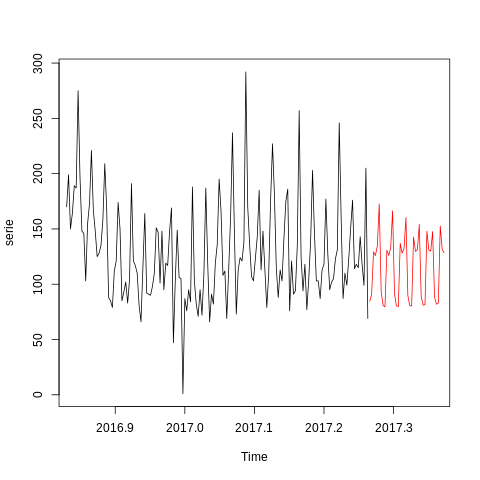

In [57]:
%%R
plot(serie,xlim=c(2016.84,2017.36))
lines(pred,col="red")

In [58]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [59]:
%%R
library(tseries)

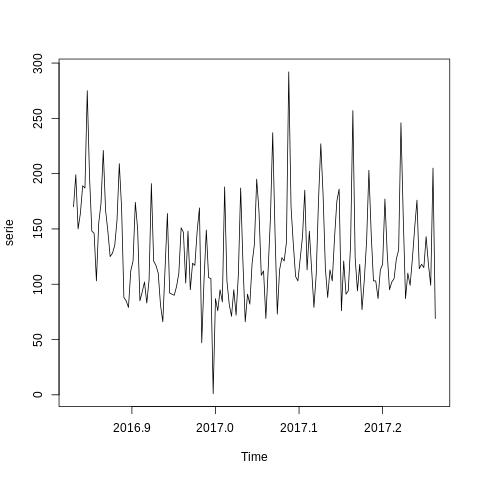

In [60]:
%%R -i serieVentas

serie<-ts(serieVentas$counts,frequency=365,start=c(2016,304))
plot(serie)

In [61]:
%%R
serie

Time Series:
Start = c(2016, 304) 
End = c(2017, 97) 
Frequency = 365 
  [1] 170 199 150 164 189 187 275 197 148 146 103 155 173 221 167 148 125 128
 [19] 135 158 209 169  88  85  79 112 121 174 150  85  93 102  83 104 191 121
 [37] 117 110  81  66 115 164  92  91  90  98 110 151 147 101 148  95 119 117
 [55] 148 169  47 104 149 106 105   1  87  76  95  84 188 103  82  71  95  72
 [73] 109 187 119  66  91  82 119 136 195 166 108 112  69 113 160 237 147  73
 [91] 113 124 121 138 292 170 136 107 103 123 143 185 113 148 113  79 109 176
[109] 227 181 114  88 113 103 142 175 186  76 121  91  94 135 257 124  94 118
[127]  77 104 139 203 146 103 103  87 113 118 177 128  95 102 105 123 131 246
[145] 161  87 110  99 123 151 176 114 118 115 143 118  99 205  69


# Clasificación de la serie

## Cambios en media

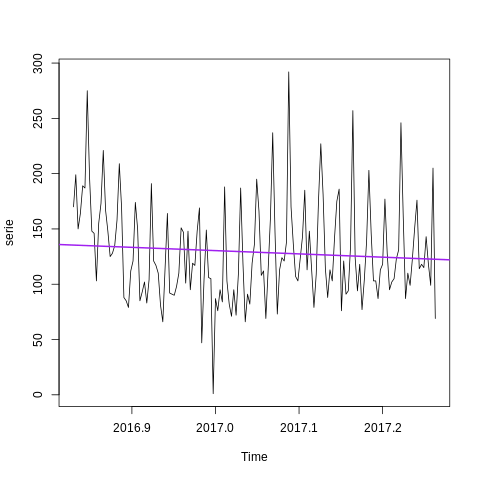

In [62]:
%%R
lineal<-lm(serie~time(serie))
plot(serie)
abline(lineal,col="purple",lwd=2)

In [63]:
%%R
summary(lineal)


Call:
lm(formula = serie ~ time(serie))

Residuals:
    Min      1Q  Median      3Q     Max 
-129.44  -30.64  -10.06   21.07  164.24 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept) 59928.33   57273.30   1.046    0.297
time(serie)   -29.65      28.39  -1.044    0.298

Residual standard error: 45.02 on 157 degrees of freedom
Multiple R-squared:  0.006896,	Adjusted R-squared:  0.0005703 
F-statistic:  1.09 on 1 and 157 DF,  p-value: 0.298



H0: La regresión no es significativa        
Ha: La regresión es significativa

- pvalor = 0.298

- alfa = 0.05

Como p-valor > alfa, no rechazo H0 

Por lo tanto, con el 95% de confianza se tiene evidencia estadística para decir que la regresión no es significativa





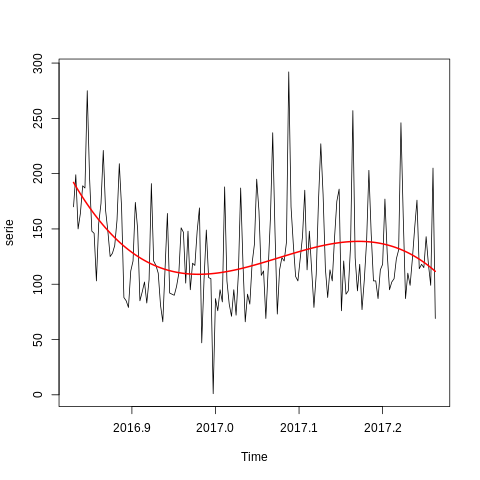

In [64]:
%%R
cubico<-lm(serie~poly(as.numeric(time(serie)),degree=3))
plot(serie)
lines(as.numeric(time(serie)),fitted.values(cubico),col="red",lwd=2)

In [65]:
%%R
summary(cubico)


Call:
lm(formula = serie ~ poly(as.numeric(time(serie)), degree = 3))

Residuals:
     Min       1Q   Median       3Q      Max 
-108.675  -25.393   -7.553   18.290  165.313 

Coefficients:
                                           Estimate Std. Error t value Pr(>|t|)
(Intercept)                                 128.975      3.328  38.750  < 2e-16
poly(as.numeric(time(serie)), degree = 3)1  -47.009     41.969  -1.120 0.264410
poly(as.numeric(time(serie)), degree = 3)2  131.448     41.969   3.132 0.002076
poly(as.numeric(time(serie)), degree = 3)3 -167.205     41.969  -3.984 0.000104
                                              
(Intercept)                                ***
poly(as.numeric(time(serie)), degree = 3)1    
poly(as.numeric(time(serie)), degree = 3)2 ** 
poly(as.numeric(time(serie)), degree = 3)3 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 41.97 on 155 degrees of freedom
Multiple R-squared:  0.1481,	Adjusted R-squared:  

H0: La regresión no es significativa        
Ha: La regresión es significativa

- pvalor = 1.609e-05

- alfa = 0.05

Como p-valor < alfa, rechazo H0 

Por lo tanto, con el 95% de confianza se tiene evidencia estadística para decir que la regresión es significativa

<<< Como la serie presenta tendencia, no es estacionaria en media >>>

## Cambios en varianza

In [66]:
%%R 
adf.test(serie,alternative="stationary")


	Augmented Dickey-Fuller Test

data:  serie
Dickey-Fuller = -3.8297, Lag order = 5, p-value = 0.01936
alternative hypothesis: stationary



H0: La serie no es estacionaria en varianza       
Ha: La serie es estacionaria en varianza

- pvalor = 0.01936

- alfa = 0.05

Como p-valor < alfa, rechazo H0 

Por lo tanto, con el 95% de confianza se tiene evidencia estadística para decir que la serie es estacionaria en varianza

## Clasificación de la serie: 

Serie no estacionaria por cambios en media

# Corrección de la serie

Para hacer la serie estacionaria, se hará una correción usando la función de diferenciación

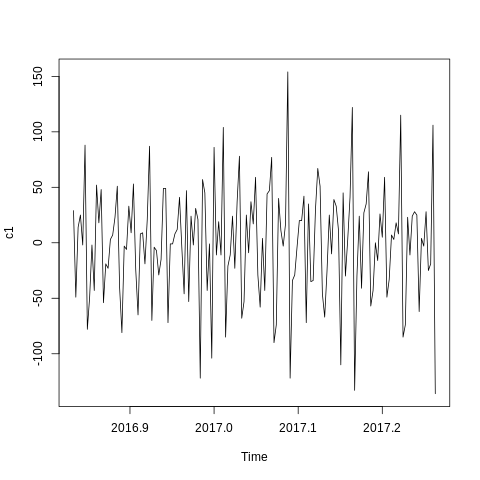

In [67]:
%%R
c1<-diff(serie)
plot(c1)

## Cambios en media 


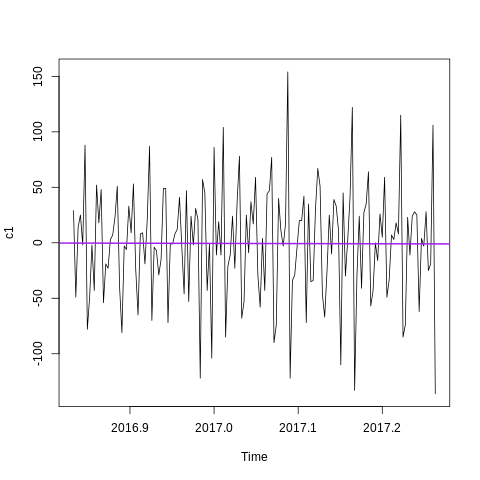

In [68]:
%%R
lineal<-lm(c1~time(c1))
plot(c1)
abline(lineal,col="purple",lwd=2)

In [69]:
%%R
summary(lineal)


Call:
lm(formula = c1 ~ time(c1))

Residuals:
     Min       1Q   Median       3Q      Max 
-135.001  -31.364    3.871   30.390  154.706 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept)  3373.831  65555.913   0.051    0.959
time(c1)       -1.673     32.501  -0.051    0.959

Residual standard error: 51.05 on 156 degrees of freedom
Multiple R-squared:  1.698e-05,	Adjusted R-squared:  -0.006393 
F-statistic: 0.00265 on 1 and 156 DF,  p-value: 0.959



H0: La regresión no es significativa        
Ha: La regresión es significativa

- pvalor = 0.959

- alfa = 0.05

Como p-valor > alfa, no rechazo H0 

Por lo tanto, con el 95% de confianza se tiene evidencia estadística para decir que la regresión no es significativa

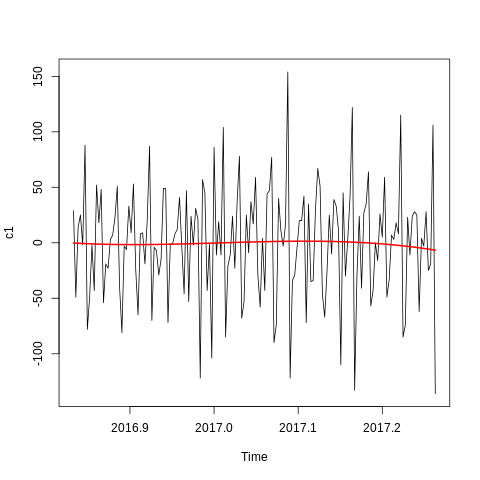

In [70]:
%%R
cubico<-lm(c1~poly(as.numeric(time(c1)),degree=3))
plot(c1)
lines(as.numeric(time(c1)),fitted.values(cubico),col="red",lwd=2)

In [71]:
%%R
summary(cubico)


Call:
lm(formula = c1 ~ poly(as.numeric(time(c1)), degree = 3))

Residuals:
     Min       1Q   Median       3Q      Max 
-133.506  -31.304    3.746   31.866  152.654 

Coefficients:
                                        Estimate Std. Error t value Pr(>|t|)
(Intercept)                              -0.6392     4.0853  -0.156    0.876
poly(as.numeric(time(c1)), degree = 3)1  -2.6277    51.3508  -0.051    0.959
poly(as.numeric(time(c1)), degree = 3)2 -15.9848    51.3508  -0.311    0.756
poly(as.numeric(time(c1)), degree = 3)3 -14.1451    51.3508  -0.275    0.783

Residual standard error: 51.35 on 154 degrees of freedom
Multiple R-squared:  0.001138,	Adjusted R-squared:  -0.01832 
F-statistic: 0.05847 on 3 and 154 DF,  p-value: 0.9814



H0: La regresión no es significativa        
Ha: La regresión es significativa

- pvalor = 0.9814

- alfa = 0.05

Como p-valor > alfa, no rechazo H0 

Por lo tanto, con el 95% de confianza se tiene evidencia estadística para decir que la regresión no es significativa

La serie no presenta tendencia, serie estacionaria en media

## Cambios en varianza

In [72]:
%%R 
adf.test(c1,alternative="stationary")


	Augmented Dickey-Fuller Test

data:  c1
Dickey-Fuller = -17.968, Lag order = 5, p-value = 0.01
alternative hypothesis: stationary



H0: La serie no es estacionaria en varianza       
Ha: La serie es estacionaria en varianza

- pvalor = 0.01

- alfa = 0.05

Como p-valor < alfa, rechazo H0 

Por lo tanto, con el 95% de confianza se tiene evidencia estadística para decir que la serie es estacionaria en varianza

## Clasificación de la serie
La serie es estacionaria

# Selección de modelo

In [73]:
%%R

options(warns=-1)
min<-Inf

for(j in 0:9){
  
  for(i in 0:9){
    
    u<-AIC(arima(c1,order=c(j,0,i),method="ML"))
    
    if(u<min){
      min<-u
      pq<-c(j,i)
    }
  }
}

min
pq


[1] 7 9


Después de correr el ciclo, el mejor modelo para la corrección es un ARMA(7,9)

** Corriendo el ciclo más veces se llega a un ARMA(8,10)


In [74]:
%%R

mejor<-arima(c1,order=c(8,0,10),method="ML")


In [87]:
%%R
AIC(mejor)

[1] 1540.943


# Ruido blanco

Para saber si se pueden hacer preddicciones con el modelo, se tiene que checar que se cumplan los supuestos de ruido blanco

In [76]:
%%R

r<-residuals(mejor)

## Media cero

In [77]:
%%R 

cat(mean(r))
cat("\n",mean(r)/var(r))


0.1615814
 0.0002350369

Como la media es cercana al cero, se puede decir que el supuesto de media cero se cumple

## Varianza constante

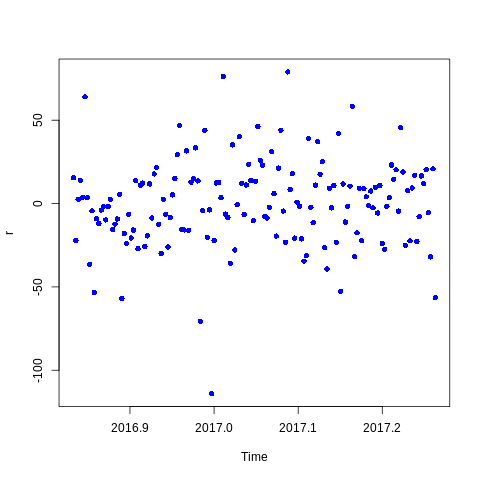

In [78]:
%%R 

plot(r,type="p",col="blue",pch=16)

Como no se tienen patrones aparentes, el supuesto de varianza constante también se cumple

## Incorrelación 

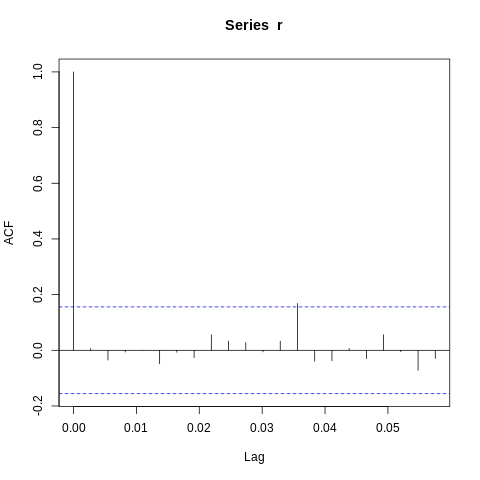

In [79]:
%%R
acf(r)

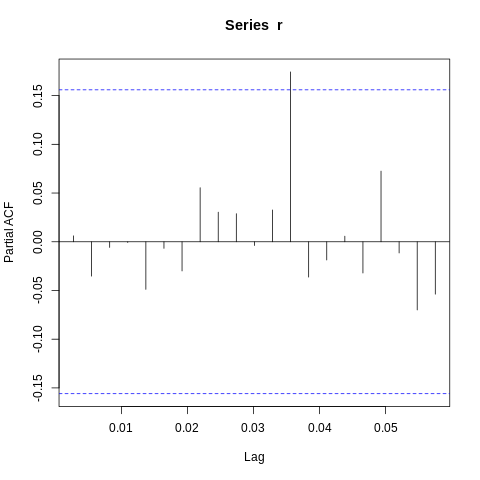

In [80]:
%%R
pacf(r)

In [81]:
%%R
Box.test(r)


	Box-Pierce test

data:  r
X-squared = 0.0058986, df = 1, p-value = 0.9388



H0: Los datos son indpendientes      
Ha: Los datos son dependientes

- pvalor = 0.0.9388

- alfa = 0.05

Como p-valor > alfa, no rechazo H0 

Por lo tanto, con el 95% de confianza se tiene evidencia estadística para decir que los residuales son independientes

Por lo tanto los datos cumplen con los supuestos de ruido blanco, es seguro hacer predicciones

## Normalidad

In [82]:
%%R
shapiro.test(r)


	Shapiro-Wilk normality test

data:  r
W = 0.96912, p-value = 0.00131



H0: Los datos siguen una distribución normal      
Ha: Los datos siguen cualquier otra distribución

- pvalor = 0.00131

- alfa = 0.05

Como p-valor < alfa, rechazo H0 

Por lo tanto, con el 95% de confianza se tiene evidencia estadística para decir que los residuales no siguen una distribución normal

## Predicciones

In [89]:
%%R
mejor.org<-arima(serie,order=c(8,1,10),method="ML")

In [96]:
%%R 
pred<-predict(mejor.org,n.ahead=30)$pred
pred

Time Series:
Start = c(2017, 98) 
End = c(2017, 127) 
Frequency = 365 
 [1]  95.37791  99.17325 124.20434 107.45706 113.68934 163.71635 102.32559
 [8] 101.40417 104.86889 139.85435 114.43803 110.59125 152.39824  96.24305
[15] 101.60137 108.88010 148.98774 115.99392 107.07480 145.05239  95.42426
[22] 103.79800 110.80585 153.69980 114.86896 104.31075 140.58559  97.56287
[29] 106.41403 110.93165


La tabla arriba presentada serían el número de ventas esperados para los próximos 40 días, empezando el 5 de septiembre del 2017

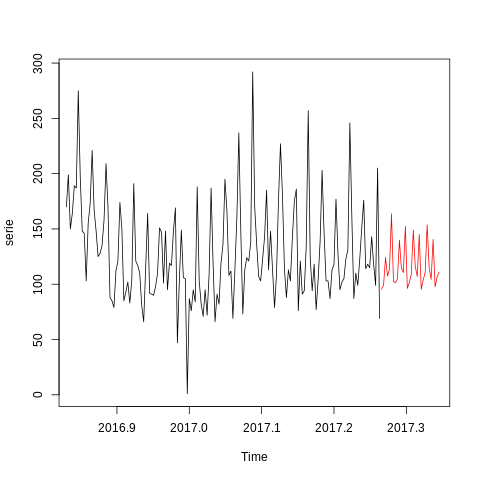

In [101]:
%%R
plot(serie,xlim=c(2016.84,2017.34))
lines(pred,col="red")

## Error porcentual absoluto medio




In [95]:
%%R
diferencia<-serie - mejor.org$residual
e<-mean(abs((serie-diferencia)/serie))*100

cat(e,"%")

89.59449 %

# Conclusión final

Tomando en cuenta el análisis que se realizó pudimos identificar de manera satisfactoria la popularidad de los productos del menú, destacando la incidencia en función a la hora del día. A su vez se distinguieron claras tendencias en la compra de ciertos productos, fuese de manera individual o colectiva.

Con la investigación llevada a cabo a lo largo del semestre pudimos reconocer la importancia de la investigación en distintos ámbitos, puesto que estos nos pueden dar una visión más amplia de los movimientos y fluctuaciones en una empresa con giro comercial, en este caso particular, una panadería.

A futuro sería interesante investigar la venta individual por producto así como aplicar estas técnicas para encontrar áreas de oportunidad en distintos ámbitos.